## Time Series Modeling

1) Plot the data with proper labeling and make some observations on the graph.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime
from sklearn import metrics
from statsmodels.tsa.ar_model import AutoReg
from numpy import sqrt
from sklearn.metrics import mean_squared_error

In [4]:
time_df = pd.read_csv("/Users/theranmeadows/Desktop/Bellevue University/dsc630predictiveAnalytics/week8/us_retail_sales.csv")
time_df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1992,146925,147223,146805,148032,149010,149800,150761.0,151067.0,152588.0,153521.0,153583.0,155614.0
1,1993,157555,156266,154752,158979,160605,160127,162816.0,162506.0,163258.0,164685.0,166594.0,168161.0
2,1994,167518,169649,172766,173106,172329,174241,174781.0,177295.0,178787.0,180561.0,180703.0,181524.0
3,1995,182413,179488,181013,181686,183536,186081,185431.0,186806.0,187366.0,186565.0,189055.0,190774.0
4,1996,189135,192266,194029,194744,196205,196136,196187.0,196218.0,198859.0,200509.0,200174.0,201284.0


<Axes: xlabel='YEAR'>

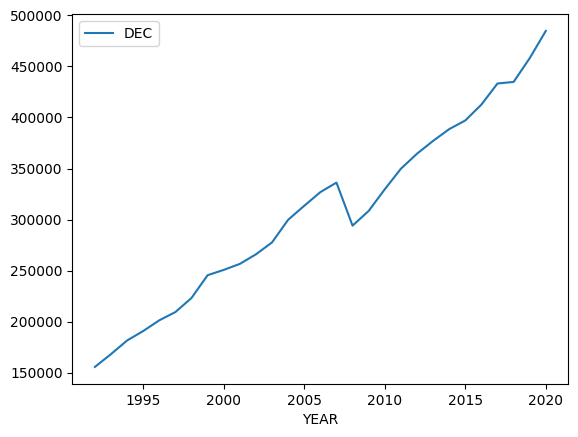

In [5]:
time_df.plot('YEAR', 'DEC')

Although not pictured to save room, plotting all months by year showed a very similar line shape across all months. An increase from 1995 to 2006-2007, a sharp decline from 2008-2009 and then back to an increase all th way till 2021. We can confrim this with the MELT function below.

In [6]:
#transpose the data with melt
time_df_short = pd.melt(time_df, id_vars=['YEAR'], var_name="MONTH", value_name="SALES")

In [7]:
time_df_short.head()

,YEAR,MONTH,SALES
0,1992,JAN,146925.0
1,1993,JAN,157555.0
2,1994,JAN,167518.0
3,1995,JAN,182413.0
4,1996,JAN,189135.0


In [ ]:
#assign number to the month names
time_df_short['Month'] = time_df_short['MONTH'].map({'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,'OCT':10,'NOV':11,'DEC':12})

In [ ]:
time_df_short['DATE']=pd.to_datetime(time_df_short[['YEAR','Month']].assign(DAY=1))

In [ ]:
time_df_short.head()

,YEAR,MONTH,SALES,Month,DATE
0,1992,JAN,146925.0,1,1992-01-01
1,1993,JAN,157555.0,1,1993-01-01
2,1994,JAN,167518.0,1,1994-01-01
3,1995,JAN,182413.0,1,1995-01-01
4,1996,JAN,189135.0,1,1996-01-01


In [ ]:
#clean the data up
time_df_clean = time_df_short[['DATE','SALES']].sort_values('DATE')
time_df_clean = time_df_clean.dropna()
time_datetime_index = pd.DatetimeIndex(time_df_clean['DATE'].values)
time_df_clean = time_df_clean.set_index(time_datetime_index)
time_df_clean.drop('DATE', axis=1, inplace=True)
time_df_clean

,SALES
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0
...,...
2021-02-01,504458.0
2021-03-01,559871.0
2021-04-01,562269.0
2021-05-01,548987.0


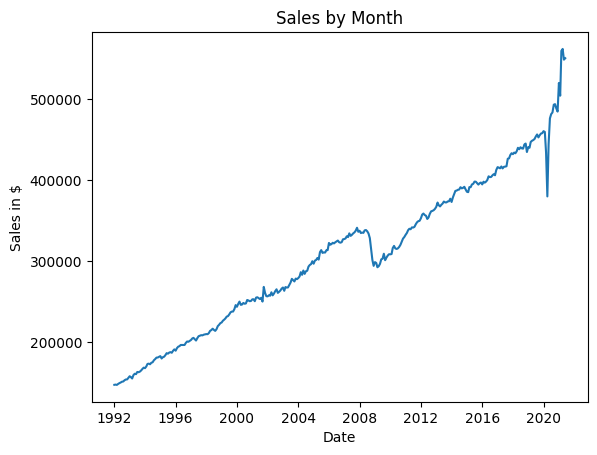

In [ ]:
#plot the new frame to confrim the line trends of the first graph
plt.plot(time_df_clean["SALES"])
plt.title('Sales by Month')
plt.xlabel('Date')
plt.ylabel('Sales in $')
plt.show()

2) Split this data into a training and test set. Use the last year of data (July 2020 – June 2021) of data as your test set and the rest as your training set.

In [ ]:
train_time_df = time_df_clean[time_df_clean.index < '2020-07-01']
test_time_df = time_df_clean[time_df_clean.index >= '2020-07-01']

In [ ]:
train_time_df

,SALES
1992-01-01,146925.0
1992-02-01,147223.0
1992-03-01,146805.0
1992-04-01,148032.0
1992-05-01,149010.0
...,...
2020-02-01,459610.0
2020-03-01,434281.0
2020-04-01,379892.0
2020-05-01,444631.0


In [ ]:
test_time_df

,SALES
2020-07-01,481627.0
2020-08-01,483716.0
2020-09-01,493327.0
2020-10-01,493991.0
2020-11-01,488652.0
2020-12-01,484782.0
2021-01-01,520162.0
2021-02-01,504458.0
2021-03-01,559871.0
2021-04-01,562269.0


3) Use the training set to build a predictive model for the monthly retail sales.

In [ ]:
time_model = AutoReg(train_time_df,lags=5).fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(time_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  SALES   No. Observations:                  342
Model:                     AutoReg(5)   Log Likelihood               -3375.942
Method:               Conditional MLE   S.D. of innovations           5424.567
Date:                Sat, 03 Feb 2024   AIC                           6765.884
Time:                        20:36:22   BIC                           6792.624
Sample:                    06-01-1992   HQIC                          6776.542
                         - 06-01-2020                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2180.0628   1089.933      2.000      0.045      43.833    4316.293
SALES.L1       0.8523      0.055     15.449      0.000       0.744       0.960
SALES.L2      -0.3524      0.080     -4.407      0.0

4) Use the model to predict the monthly retail sales on the last year of data.

In [ ]:
time_pred = time_model.predict(start = len(train_time_df), end = (len(time_df_clean)-1),dynamic = False)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


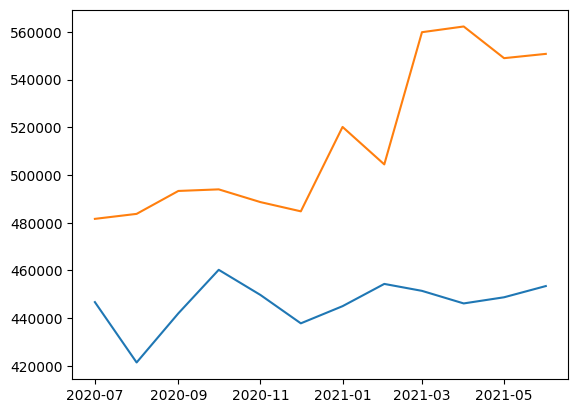

In [ ]:
plt.plot(time_pred)
plt.plot(test_time_df)

5) Report the RMSE of the model predictions on the test set.

In [ ]:
rmse = sqrt(mean_squared_error(test_time_df, time_pred))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 73875.521
